# `HESSCatalogueSources_Prior`

The `HESSCatalogueSources_Prior` class instantiates a conventional astrophysical model for known sources within the HESS catalogue within the defined binning geometry.

It is a sub-class of the `SourceFluxDiscreteLogPrior` hence requires a pointing direction, observation time and IRFs to construct the exposure. 

We'll construct our binning geometries to be from 0.1 to 100 TeV and -3 to 3 degrees in galactic longitude and latitude.

In [1]:
from gammabayes import GammaBinning
from gammabayes.priors import HESSCatalogueSources_Prior, FermiGaggeroDiffusePrior
from gammabayes.likelihoods.irfs import IRF_LogLikelihood


import numpy as np
from astropy import units as u

pointing_direction = np.array([0., 0.])*u.deg
observation_time = 5*u.hr

true_binning_geometry = GammaBinning(energy_axis=np.logspace(-1, 2, 181)*u.TeV, 
                                        lon_axis=np.linspace(-3, 3, 121)*u.deg, 
                                        lat_axis=np.linspace(-3, 3, 120)*u.deg)
recon_binning_geometry = GammaBinning(energy_axis=np.logspace(-1, 2, 121)*u.TeV, 
                                        lon_axis=np.linspace(-3, 3, 61)*u.deg, 
                                        lat_axis=np.linspace(-3, 3, 60)*u.deg)


irf_loglike = IRF_LogLikelihood(
    pointing_dir=pointing_direction,
    observation_time=observation_time,
    binning_geometry = recon_binning_geometry,
    true_binning_geometry=true_binning_geometry,
)



hess_prior = HESSCatalogueSources_Prior(
    binning_geometry=true_binning_geometry,
    pointing_dir=pointing_direction,
    observation_time=observation_time,
    irf_loglike=irf_loglike
)

/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/gammapy/modeling/models/spatial.py:583: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)


(<Figure size 1200x300 with 5 Axes>,
 array([<Axes: xlabel='Energy [TeV]'>,
        <Axes: xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <Axes: xlabel='Energy [TeV]', ylabel='Longitude [deg]'>],
       dtype=object))

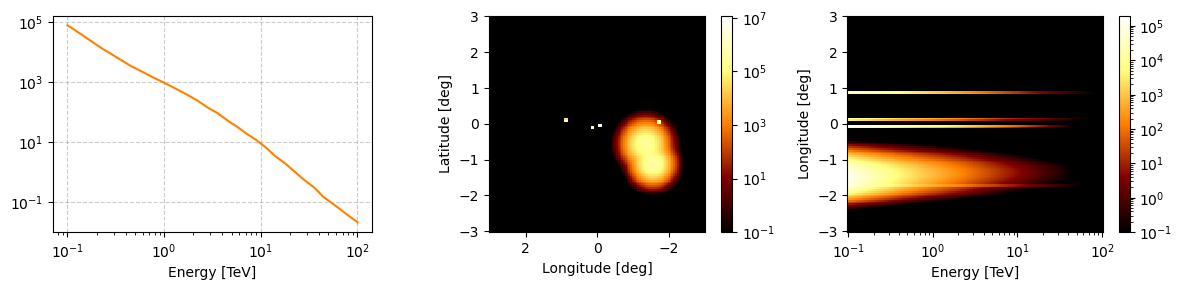

In [12]:
hess_prior.peek(norm='log', vmin=1e-1, figsize=(12,3), cmap='afmhot')

# `FermiGaggeroDiffusePrior`

The `FermiGaggeroDiffusePrior` class instantiates a conventional astrophysical model for diffuse emission around the galactic centre. The morphology follows that of the `Pass8` Fermi IEM model and the spectral distribution follows that of Gaggero et al. 2017.

It is a sub-class of the `SourceFluxDiscreteLogPrior` hence requires a pointing direction, observation time and IRFs to construct the exposure. 

We'll construct our binning geometries to be from 0.1 to 100 TeV and -3 to 3 degrees in galactic longitude and latitude.

In [3]:
from gammabayes import GammaBinning
from gammabayes.priors import HESSCatalogueSources_Prior, FermiGaggeroDiffusePrior
from gammabayes.likelihoods.irfs import IRF_LogLikelihood


import numpy as np
from astropy import units as u

pointing_direction = np.array([0., 0.])*u.deg
observation_time = 5*u.hr

true_binning_geometry = GammaBinning(energy_axis=np.logspace(-1, 2, 181)*u.TeV, 
                                        lon_axis=np.linspace(-3, 3, 121)*u.deg, 
                                        lat_axis=np.linspace(-3, 3, 120)*u.deg)
recon_binning_geometry = GammaBinning(energy_axis=np.logspace(-1, 2, 121)*u.TeV, 
                                        lon_axis=np.linspace(-3, 3, 61)*u.deg, 
                                        lat_axis=np.linspace(-3, 3, 60)*u.deg)



irf_loglike = IRF_LogLikelihood(
    pointing_dir=pointing_direction,
    observation_time=observation_time,
    binning_geometry = recon_binning_geometry,
    true_binning_geometry=true_binning_geometry,
)

diffuse_prior = FermiGaggeroDiffusePrior(
    binning_geometry=true_binning_geometry,
    pointing_dir=pointing_direction,
    observation_time=observation_time,
    irf_loglike=irf_loglike
)

/Users/lpin0002/anaconda3/envs/testofwest/lib/python3.12/site-packages/gammabayes/priors/astro_sources/diffuse_emission/fermi_gaggero_diffuse.py:79: RuntimeWarning: divide by zero encountered in log
  fermi_integral_values= logspace_integrator(logy=np.log(fermievaluated.value), x=energy_axis, axis=0)


(<Figure size 1200x300 with 5 Axes>,
 array([<Axes: xlabel='Energy [TeV]'>,
        <Axes: xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <Axes: xlabel='Energy [TeV]', ylabel='Longitude [deg]'>],
       dtype=object))

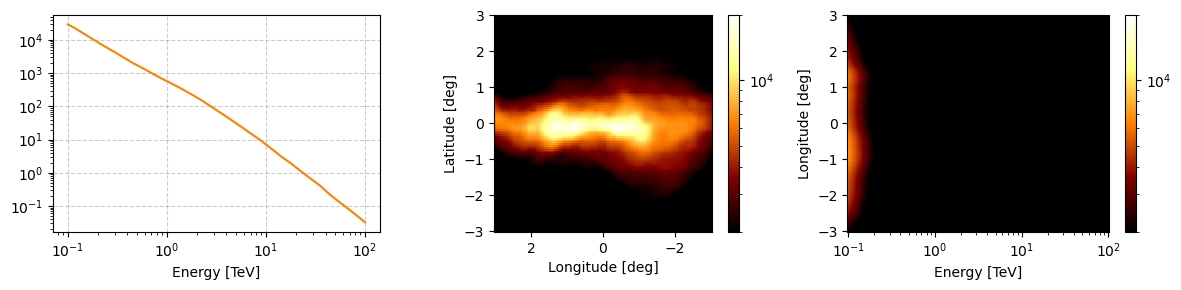

In [24]:
diffuse_prior.peek(norm='log', vmin=2e3, vmax=2e4, figsize=(12,3), cmap='afmhot')